In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#file to load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#Combine the data into a single dataset
#Merge
mrged_df = pd.merge(ride_data, city_data ,on="city", how="left")


#Display the data table for preview
mrged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

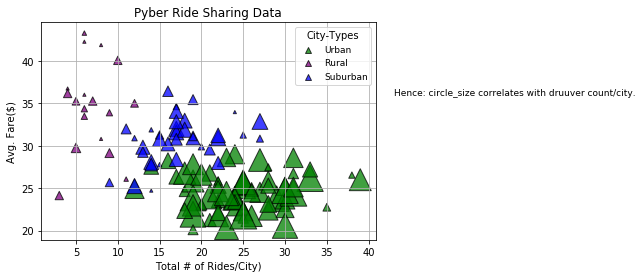

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban_citytype = mrged_df[mrged_df["type"] == "Urban"].groupby([mrged_df["city"]])
rural_citytype = mrged_df[mrged_df["type"] == "Rural"].groupby([mrged_df["city"]])
suburban_citytype = mrged_df[mrged_df["type"] == "Suburban"].groupby([mrged_df["city"]])

#Urban Calculation to ride count (x), fare avg (y), & driver count avg.(s)
urban_x = urban_citytype["ride_id"].count()
urban_y = urban_citytype["fare"].mean()
urban_s = urban_citytype["driver_count"].mean()

#Rural Calc.
rural_x = rural_citytype["ride_id"].count()
rural_y = rural_citytype["fare"].mean()
rural_s = rural_citytype["driver_count"].mean()

#Suburban Calc.
suburban_x = suburban_citytype["ride_id"].count()
suburban_y = suburban_citytype["fare"].mean()
suburban_s = suburban_citytype["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label="Urban", s=urban_s * 10, color=["green"], 
            edgecolor="black", alpha=0.75, marker = "^")
plt.scatter(rural_x, rural_y, label="Rural", s=rural_s * 10, color=["purple"], 
            edgecolor="black", alpha=0.75, marker = "^")
plt.scatter(suburban_x, suburban_y, label="Suburban", s=suburban_s * 10, color=["blue"], 
            edgecolor="black", alpha=0.75, marker = "^")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total # of Rides/City)")
plt.ylabel("Avg. Fare($)")
plt.title("Pyber Ride Sharing Data")

# Create a legend
legend = plt.legend(fontsize=9, title="City-Types", loc="best")

#Optimize legeng
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(43,36, "Hence: circle_size correlates with druuver count/city.",fontsize=9)

# Save Figure
plt.savefig('samedirectory.png')

#showPlot
plt.show()

In [14]:
# Show plot
plt.show()

## Total Fares by City Type

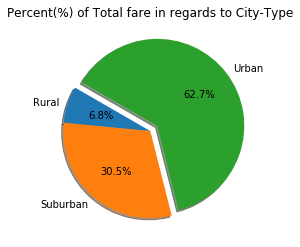

In [15]:
#Calculate Type Percents
grouped_by_type = mrged_df.groupby(['type'])
sum_of_fare = grouped_by_type['fare'].sum()

#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["purple","blue","green"]
plt.pie(sum_of_fare, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent(%) of Total fare in regards to City-Type")

# Save Figure
#plt.savefig() ---> fix saving figure

# Show piePlot
plt.show()

In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

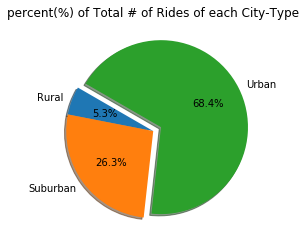

In [17]:
#Calculate Ride Percents
count_of_rides = grouped_by_type['ride_id'].count()

#Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = [0, 0, 0.1]
colors = ["purple","blue", "green"]
plt.pie(count_of_rides, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("percent(%) of Total # of Rides of each City-Type")

#Save Figure
#plt.savefig() ---> fix saving figure

#Show piePlot
plt.show()

In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

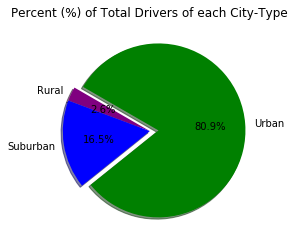

In [19]:
#Calculate Driver Percents
grouped_by_drivers = city_data.groupby(['type'])
sum_of_drivers = grouped_by_drivers['driver_count'].sum()

#Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = [0, 0, 0.1]
colors = ["purple","blue","green"]
plt.pie(sum_of_drivers, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent (%) of Total Drivers of each City-Type")
#Save Figure
#plt.savefig() ---> fix saving figure

#Show piePlot
plt.show()

In [20]:
# Show Figure
plt.show()